<a href="https://colab.research.google.com/github/mhtasnia/DS424/blob/main/DS424_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
# Create tensors
scalar = tf.constant(7)
vector = tf.constant([1, 2, 3])
matrix = tf.constant([[1, 2], [3, 4]])
print("Scalar:", scalar)
print("Vector:", vector)
print("Matrix:", matrix)
# Tensor operations
added = tf.add(vector, [4, 5, 6])
multiplied = tf.multiply(matrix, 2)
reshaped = tf.reshape(matrix, [4, 1])
print("Added vector:", added.numpy())
print("Multiplied matrix:", multiplied.numpy())
print("Reshaped matrix:", reshaped.numpy())

Scalar: tf.Tensor(7, shape=(), dtype=int32)
Vector: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
Matrix: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Added vector: [5 7 9]
Multiplied matrix: [[2 4]
 [6 8]]
Reshaped matrix: [[1]
 [2]
 [3]
 [4]]


In [ ]:
import numpy as np
a = tf.constant([[1, 2], [3, 4]], dtype=tf.int32)
b = tf.constant([[0.5, 0.25], [0.75, 1.0]], dtype=tf.float32)
c = tf.convert_to_tensor(np.arange(12).reshape(3, 4), dtype=tf.float32)
print('Tensor a:', a)
print('Tensor b dtype:', b.dtype, 'shape:', b.shape)
print('Tensor c shape & values:\n', c.numpy())

Tensor a: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Tensor b dtype: <dtype: 'float32'> shape: (2, 2)
Tensor c shape & values:
 [[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


In [ ]:
# Broadcasting example
x = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[5.], [6.]]) # Will broadcast to match x's shape
print('x + y (broadcasted):\n', x + y)
print('Matrix multiplication (x @ x):\n', tf.matmul(x, x))

x + y (broadcasted):
 tf.Tensor(
[[ 6.  7.]
 [ 9. 10.]], shape=(2, 2), dtype=float32)
Matrix multiplication (x @ x):
 tf.Tensor(
[[ 7. 10.]
 [15. 22.]], shape=(2, 2), dtype=float32)


In [ ]:
# Gradient example
x = tf.Variable([[1., 2.], [3., 4.]])
with tf.GradientTape() as tape:
    y = tf.reduce_sum(x ** 2)
dy_dx = tape.gradient(y, x)
print('dy/dx =', dy_dx.numpy())

dy/dx = [[2. 4.]
 [6. 8.]]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Build model
inputs = keras.Input(shape=(28, 28), name='input_layer')
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_functional_model')
model.summary()

Model: "mnist_functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8123 - loss: 0.6215 - val_accuracy: 0.9613 - val_loss: 0.1282
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9452 - loss: 0.1847 - val_accuracy: 0.9707 - val_loss: 0.0951
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9577 - loss: 0.1385 - val_accuracy: 0.9762 - val_loss: 0.0811
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9638 - loss: 0.1139 - val_accuracy: 0.9790 - val_loss: 0.0761
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9692 - loss: 0.0993 - val_accuracy: 0.9787 - val_loss: 0.0752


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9738 - loss: 0.0814
Test accuracy: 0.9738


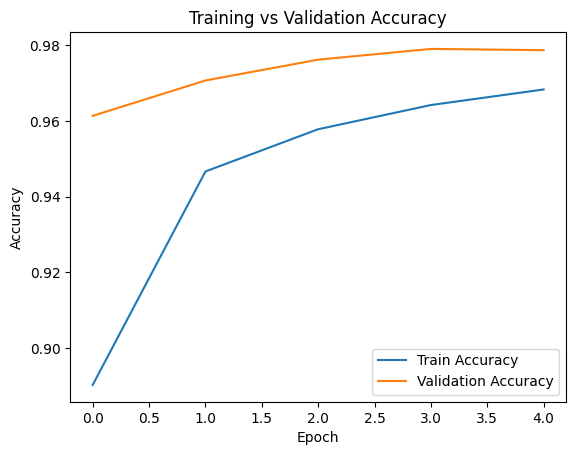

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save the model to Google Drive
save_path = '/content/drive/MyDrive/model.keras'
model.save(save_path)
print(f' Model saved successfully to {save_path}')

 Model saved successfully to /content/drive/MyDrive/model.keras


In [ ]:
load_path = '/content/drive/MyDrive/model.keras'
loaded_model = keras.models.load_model(load_path)
print(' Model loaded successfully from Drive.')

 Model loaded successfully from Drive.


In [ ]:
import os
save_dir = os.path.dirname(save_path)
checkpoint_path = os.path.join(save_dir, 'training_checkpoints', 'cp.weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
save_weights_only=True,
verbose=1,
save_freq='epoch')
model.fit(x_train, y_train, epochs=2, batch_size=64, callbacks=[cp_callback])

Epoch 1/2
933/938 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9716 - loss: 0.0918
Epoch 1: saving model to /content/drive/MyDrive/training_checkpoints/cp.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9716 - loss: 0.0918
Epoch 2/2
928/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9752 - loss: 0.0796
Epoch 2: saving model to /content/drive/MyDrive/training_checkpoints/cp.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9751 - loss: 0.0797


In [ ]:
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
print('Latest checkpoint:', latest_checkpoint)
if latest_checkpoint:
    model.load_weights(latest_checkpoint)
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Restored checkpoint model accuracy: {acc:.4f}")
else:
    print("No checkpoint found in the specified directory.")

Latest checkpoint: None
No checkpoint found in the specified directory.


# Exercise

In [ ]:
inputs = keras.Input(shape=(28, 28), name='input_layer_bn')
x = layers.Flatten() (inputs)

x = layers.Dense(128) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)
x = layers.Dropout(0.3) (x)

x = layers.Dense(64) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)

outputs = layers.Dense(10, activation='softmax', name='output_layer_bn')(x)

model2 = keras.Model(inputs=inputs, outputs=outputs, name='mnist_bn_model2')

model2.summary()

Model: "mnist_bn_model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_bn (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_bn (Dense)         │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

comparing accuracy

In [ ]:
model2.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8206 - loss: 0.6275 - val_accuracy: 0.9677 - val_loss: 0.1203
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9401 - loss: 0.2000 - val_accuracy: 0.9733 - val_loss: 0.0979
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9533 - loss: 0.1497 - val_accuracy: 0.9752 - val_loss: 0.0836
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9603 - loss: 0.1267 - val_accuracy: 0.9763 - val_loss: 0.0792
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9662 - loss: 0.1060 - val_accuracy: 0.9807 - val_loss: 0.0694


In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9772 - loss: 0.0759
Test accuracy: 0.9772


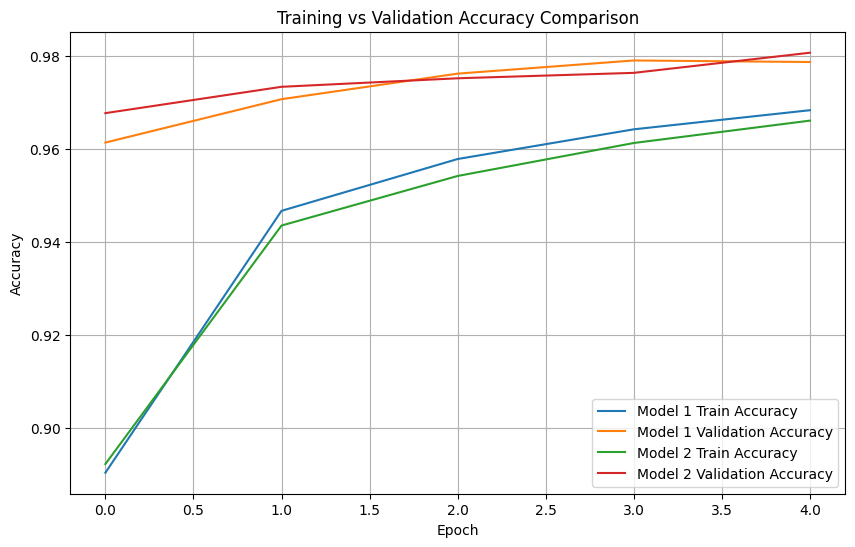

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Model 1 Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.title('Training vs Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_sgd = model2
model_sgd.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history3 = model_sgd.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9753 - loss: 0.0772 - val_accuracy: 0.9830 - val_loss: 0.0605
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9755 - loss: 0.0765 - val_accuracy: 0.9828 - val_loss: 0.0604
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9764 - loss: 0.0762 - val_accuracy: 0.9830 - val_loss: 0.0604
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9776 - loss: 0.0724 - val_accuracy: 0.9830 - val_loss: 0.0606
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9754 - loss: 0.0745 - val_accuracy: 0.9830 - val_loss: 0.0598


In [ ]:
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc_sgd:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9796 - loss: 0.0647
Test accuracy: 0.9796


In [ ]:
model_rms = model2
model_rms.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history4 = model_rms.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9705 - loss: 0.0918 - val_accuracy: 0.9792 - val_loss: 0.0714
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9732 - loss: 0.0856 - val_accuracy: 0.9782 - val_loss: 0.0730
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9734 - loss: 0.0851 - val_accuracy: 0.9815 - val_loss: 0.0711
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9746 - loss: 0.0792 - val_accuracy: 0.9817 - val_loss: 0.0700
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9749 - loss: 0.0767 - val_accuracy: 0.9810 - val_loss: 0.0702


In [ ]:
test_loss_rms, test_acc_rms = model_rms.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc_rms:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9794 - loss: 0.0715
Test accuracy: 0.9794


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28), name='input_layer_skip')
x_flatten = layers.Flatten() (inputs)

x = layers.Dense(128, activation='relu') (x_flatten)
x = layers.Dropout(0.3) (x)
x_main = layers.Dense(64, activation='relu') (x)

x_skip = layers.Dense(64, name='skip_projection') (x_flatten)


x_combined = layers.add([x_main, x_skip])

outputs = layers.Dense(10, activation='softmax', name='output_layer_skip')(x_combined)

model_skip = keras.Model(inputs=inputs, outputs=outputs, name='mnist_skip_model')
model_skip.summary()

Model: "mnist_skip_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_skip    │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 784)       │          0 │ input_layer_skip… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128)       │    100,480 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128)       │          0 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │      8,256 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip_projection     │ (None, 64)        │     50,240 │ flatten_8[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64)        │          0 │ dense_17[0][0],   │
│                     │                   │            │ skip_projection[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer_skip   │ (None, 10)        │        650 │ add[0][0]         │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 159,626 (623.54 KB)

 Trainable params: 159,626 (623.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_skip.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history_skip = model_skip.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8568 - loss: 0.4855 - val_accuracy: 0.9625 - val_loss: 0.1305
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9500 - loss: 0.1704 - val_accuracy: 0.9677 - val_loss: 0.1109
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9625 - loss: 0.1239 - val_accuracy: 0.9707 - val_loss: 0.1045
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9666 - loss: 0.1040 - val_accuracy: 0.9743 - val_loss: 0.0927
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9733 - loss: 0.0853 - val_accuracy: 0.9743 - val_loss: 0.0900


In [ ]:
test_loss_skip, test_acc_skip = model_skip.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc_skip:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9724 - loss: 0.0916
Test accuracy: 0.9724


In [ ]:
weights_save_path = '/content/drive/MyDrive/mnist_weights.weights.h5'
model2.save_weights(weights_save_path)
print(f'Model weights saved successfully to {weights_save_path}')

Model weights saved successfully to /content/drive/MyDrive/mnist_weights.weights.h5


In [ ]:
import os

inputs = keras.Input(shape=(28, 28), name='input_layer_bn')
x = layers.Flatten() (inputs)

x = layers.Dense(128) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)
x = layers.Dropout(0.3) (x)

x = layers.Dense(64) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)

outputs = layers.Dense(10, activation='softmax', name='output_layer_bn')(x)


new_model = keras.Model(inputs=inputs, outputs=outputs, name='restored_model')


weights_load_path = '/content/drive/MyDrive/mnist_weights.weights.h5'

try:
    new_model.load_weights(weights_load_path)
    print('Model weights restored successfully.')
except Exception as e:
    print(f"Error loading weights: {e}")

Model weights restored successfully.
